# Import Ekstenion

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualisasi
import seaborn as sns # Visualisasi

from sklearn.impute import KNNImputer# Imputasi
from sklearn.preprocessing import StandardScaler # Scalling
from imblearn.over_sampling import SMOTE # oversampling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler

## Membaca file 'diabetes.csv'

In [25]:
df=pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
5,5.0,116.0,74.0,0.0,NaN,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,NaN,0.248,26.0,1
7,10.0,115.0,NaN,0.0,0.0,35.3,NaN,29.0,0
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [27]:
# Cek missing value
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


# 1.  Imputasi missing value dengan mean, median, dan modus

## Mean

In [28]:
mean_imputer = SimpleImputer(strategy='mean') # Nilai yang hilang akan diganti dengan nilai mean
df_mean_imputed = df.copy()
df_mean_imputed.fillna(df_mean_imputed.mean(), inplace=True)
df_mean_imputed.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data telah dilakukan pergantian nilai yang hilang kemudian menampilkan missing value pada data yang telah dihapus.

In [29]:
df_mean_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.0,35.0,0.0,31.99368,0.627000,33.166124,1
1,1.0,85.000000,66.0,29.0,0.0,31.99368,0.351000,31.000000,0
2,8.0,183.000000,64.0,0.0,0.0,23.30000,0.672000,32.000000,1
3,1.0,89.000000,66.0,23.0,94.0,28.10000,0.167000,21.000000,0
4,0.0,120.462481,40.0,35.0,168.0,43.10000,0.465363,33.000000,1


Pada output tersebut terlihat bahwa data telah mengganti nilai dari data yang hilang dengan nilai mean dari dari kolom.

## Median

In [15]:
median_imputer = SimpleImputer(strategy='median') # Nilai yang hilang akan diganti dengan nilai median
df_median_imputed = df.copy()
df_median_imputed.fillna(df_median_imputed.median(), inplace=True)
df_mean_imputed.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data telah dilakukan pergantian nilai yang hilang kemudian menampilkan missing value pada data yang telah dihapus.

In [14]:
df_median_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1


Pada output tersebut terlihat bahwa data telah mengganti nilai dari data yang hilang dengan nilai median dari dari kolom.

## Modus

In [16]:
modus_imputer = SimpleImputer(strategy='most_frequent') # # Nilai yang hilang akan diganti dengan nilai modus
df_mode_imputed = df.copy()
df_mode_imputed.fillna(df_mode_imputed.mode().iloc[0], inplace=True)
df_mean_imputed.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data telah dilakukan pergantian nilai yang hilang kemudian menampilkan missing value pada data yang telah dihapus.

In [19]:
df_mode_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,100.0,72.0,35.0,0.0,31.2,0.627,22.0,1
1,1.0,85.0,66.0,29.0,0.0,31.2,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,100.0,40.0,35.0,168.0,43.1,0.207,33.0,1


Pada output tersebut terlihat bahwa data telah mengganti nilai dari data yang hilang dengan nilai modus dari dari kolom.

# 2. Cek korelasi antar variabel dengan heatmap

<Axes: >

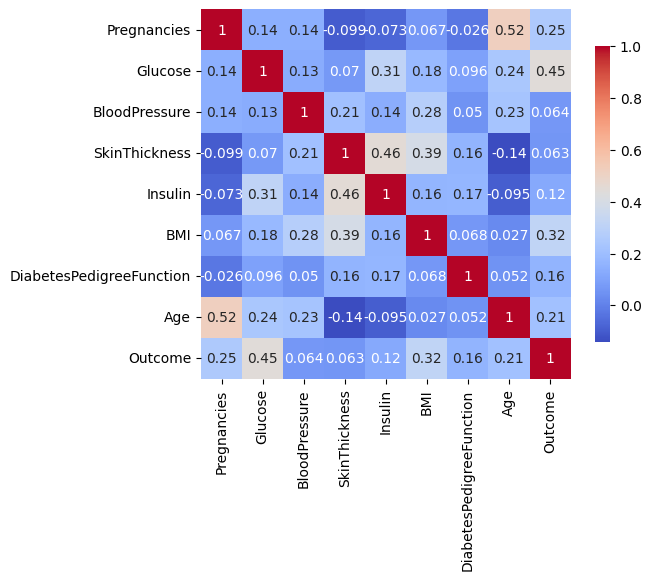

In [30]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',
            square=True, cbar_kws={'shrink': .8})

Heatmap tersebut menunjukkan hubungan antar tiap kolomnya.

# 3. Lakukan imbalance handling dengan undersampling

## Cek data sebelum dilakukan imbalance


In [39]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [72]:
# Memisahkan data berdasarkan kelas (Outcome)
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]

# undersampling kelas mayoritas
df_majority_undersampled = resample(df_majority,
                                    replace=False,
                                    n_samples=len(df_minority),
                                    random_state=42)

# Menggabungkan kelas minoritas dengan kelas mayoritas yang telah di-undersample
df_balanced = pd.concat([df_majority_undersampled, df_minority])

print(df_balanced['Outcome'].value_counts())

Outcome
0    268
1    268
Name: count, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

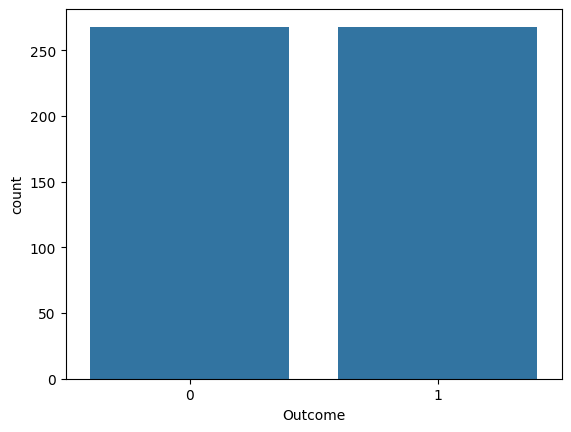

In [73]:
sns.countplot(x='Outcome', data=df_balanced)

Imbalance handling dengan undersampling dilakukan dengan memisahkan terlebihdahulu data berdasarkan kelasnya (outcome). Kemudian dilakukan undersampling pada kelas mayoritas(Karena jika pada kelas minoritas dapat menyebabkan duplikasi data). Selanjutnya dilakukan penggabungan kelas minoritas dan mayoritas dan yang terakhir divisualisasikan.

# 4.  Lakukan scaling dengan robust scaler dan minmax

## Robust Scaler


In [82]:
robust_scaler = RobustScaler()
data_mean = df_balanced.copy()

data_mean[data_mean.columns.difference(['Outcome'])] = robust_scaler.fit_transform(data_mean[data_mean.columns.difference(['Outcome'])])

print(data_mean.tail())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
755         -0.4  0.159091          1.000        0.46875  0.715385  0.460606   
757          NaN  0.045455          0.000       -0.75000       NaN  0.436364   
759          0.6  1.568182          1.250       -0.75000 -0.130769  0.339394   
761          1.2       NaN          0.125        0.21875       NaN  1.369697   
766         -0.4  0.113636         -0.750       -0.75000 -0.130769 -0.315152   

     DiabetesPedigreeFunction     Age  Outcome  
755                  1.647631  0.3750        1  
757                       NaN  1.3125        1  
759                       NaN  2.1875        1  
761                  0.058323  0.7500        1  
766                       NaN  1.0000        1  


## Min max Balance

In [83]:
minmax_scaler = MinMaxScaler()
data_mean = df_balanced.copy()

data_mean[data_mean.columns.difference(['Outcome'])] = minmax_scaler.fit_transform(data_mean[data_mean.columns.difference(['Outcome'])])

print(data_mean.tail())

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
755     0.058824  0.643216       0.771930       0.393939  0.202578  0.543964   
757          NaN  0.618090       0.631579       0.000000       NaN  0.540984   
759     0.352941  0.954774       0.807018       0.000000  0.000000  0.529061   
761     0.529412       NaN       0.649123       0.313131       NaN  0.655738   
766     0.058824  0.633166       0.526316       0.000000  0.000000  0.448584   

     DiabetesPedigreeFunction       Age  Outcome  
755                  0.433408  0.313725        1  
757                       NaN  0.607843        1  
759                       NaN  0.882353        1  
761                  0.142094  0.431373        1  
766                       NaN  0.509804        1  
